# Numerical validation of the analytical results

Go to [Index](response_Witz2019_index.ipynb).

In this notebook we show through numerical simulation that the analytical results presented are correct.

All simulation files used here were produced by executing the notebook [response_Witz2019_simulations](response_Witz2019_simulations.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, re, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'   # to export text as text, not curves
from IPython.display import Image

import sys
sys.path.append('code')
from functions_response import plot_model_check

In [3]:
# create/declare export directory for figures
fig_dir = os.path.join('figures')
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)
    
# create variables for the path to simulation files
dir_simu = 'simulations'
if not os.path.isdir(dir_simu):
    raise ValueError("Directory doesn't exist:", dir_simu)

In [4]:
# Load the simulation files
## selection parameters
nice_colors = ['darkblue', 'darkgreen', 'darkred']
names = ['glycerol','glucose','glucose8aa','glycerolauto']
simu_type = 'symmetrical'
simu_suf = 'N5T200000'
nori_init = 1
simu_dict = {}

## loading loops
for name in names:
    print("Loading simulation results for condition: {:s}...".format(name))
    simu_dict[name] = {}
    sub_dict = simu_dict[name]

    color_iter = iter(nice_colors)

    # load simulations
    fname = "{:s}_{:s}_{:s}".format(name, simu_type,simu_suf)
    color = next(color_iter)

    # load simulation file
    fpath = os.path.join(dir_simu, fname + '.pkl')
    if os.path.isfile(fpath):
        sub_dict['df'] = pd.read_pickle(fpath)
        sub_dict['format']='SIM'
        sub_dict['label']='simulation'.format(simu_type)
        sub_dict['color'] = color
        sub_dict['nori_init'] = nori_init

Loading simulation results for condition: glycerol...
Loading simulation results for condition: glucose...
Loading simulation results for condition: glucose8aa...
Loading simulation results for condition: glycerolauto...


In [5]:
# make the plots and save them
## parameters
figname_base = 'model_check'
binw_dict = None
outputdir = os.path.join(fig_dir, 'model_check')

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

## loop
for i in range(len(names)):
    name = names[i]
    fig_title = "Simulation with parameters from: {:s}".format(name)
    mydict = simu_dict[name]
#     fig = plot_simulation_overlays(mydict, bar_width=0.5, fig_title=fig_title, binw_dict=binw_dict)
    fig = plot_model_check(mydict, fig_title=fig_title)

    figname = "{:s}_{:s}".format(figname_base,name)
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ['.png']:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')

Saved figure in figures/model_check/model_check_glycerol.png
Saved figure in figures/model_check/model_check_glucose.png
Saved figure in figures/model_check/model_check_glucose8aa.png
Saved figure in figures/model_check/model_check_glycerolauto.png


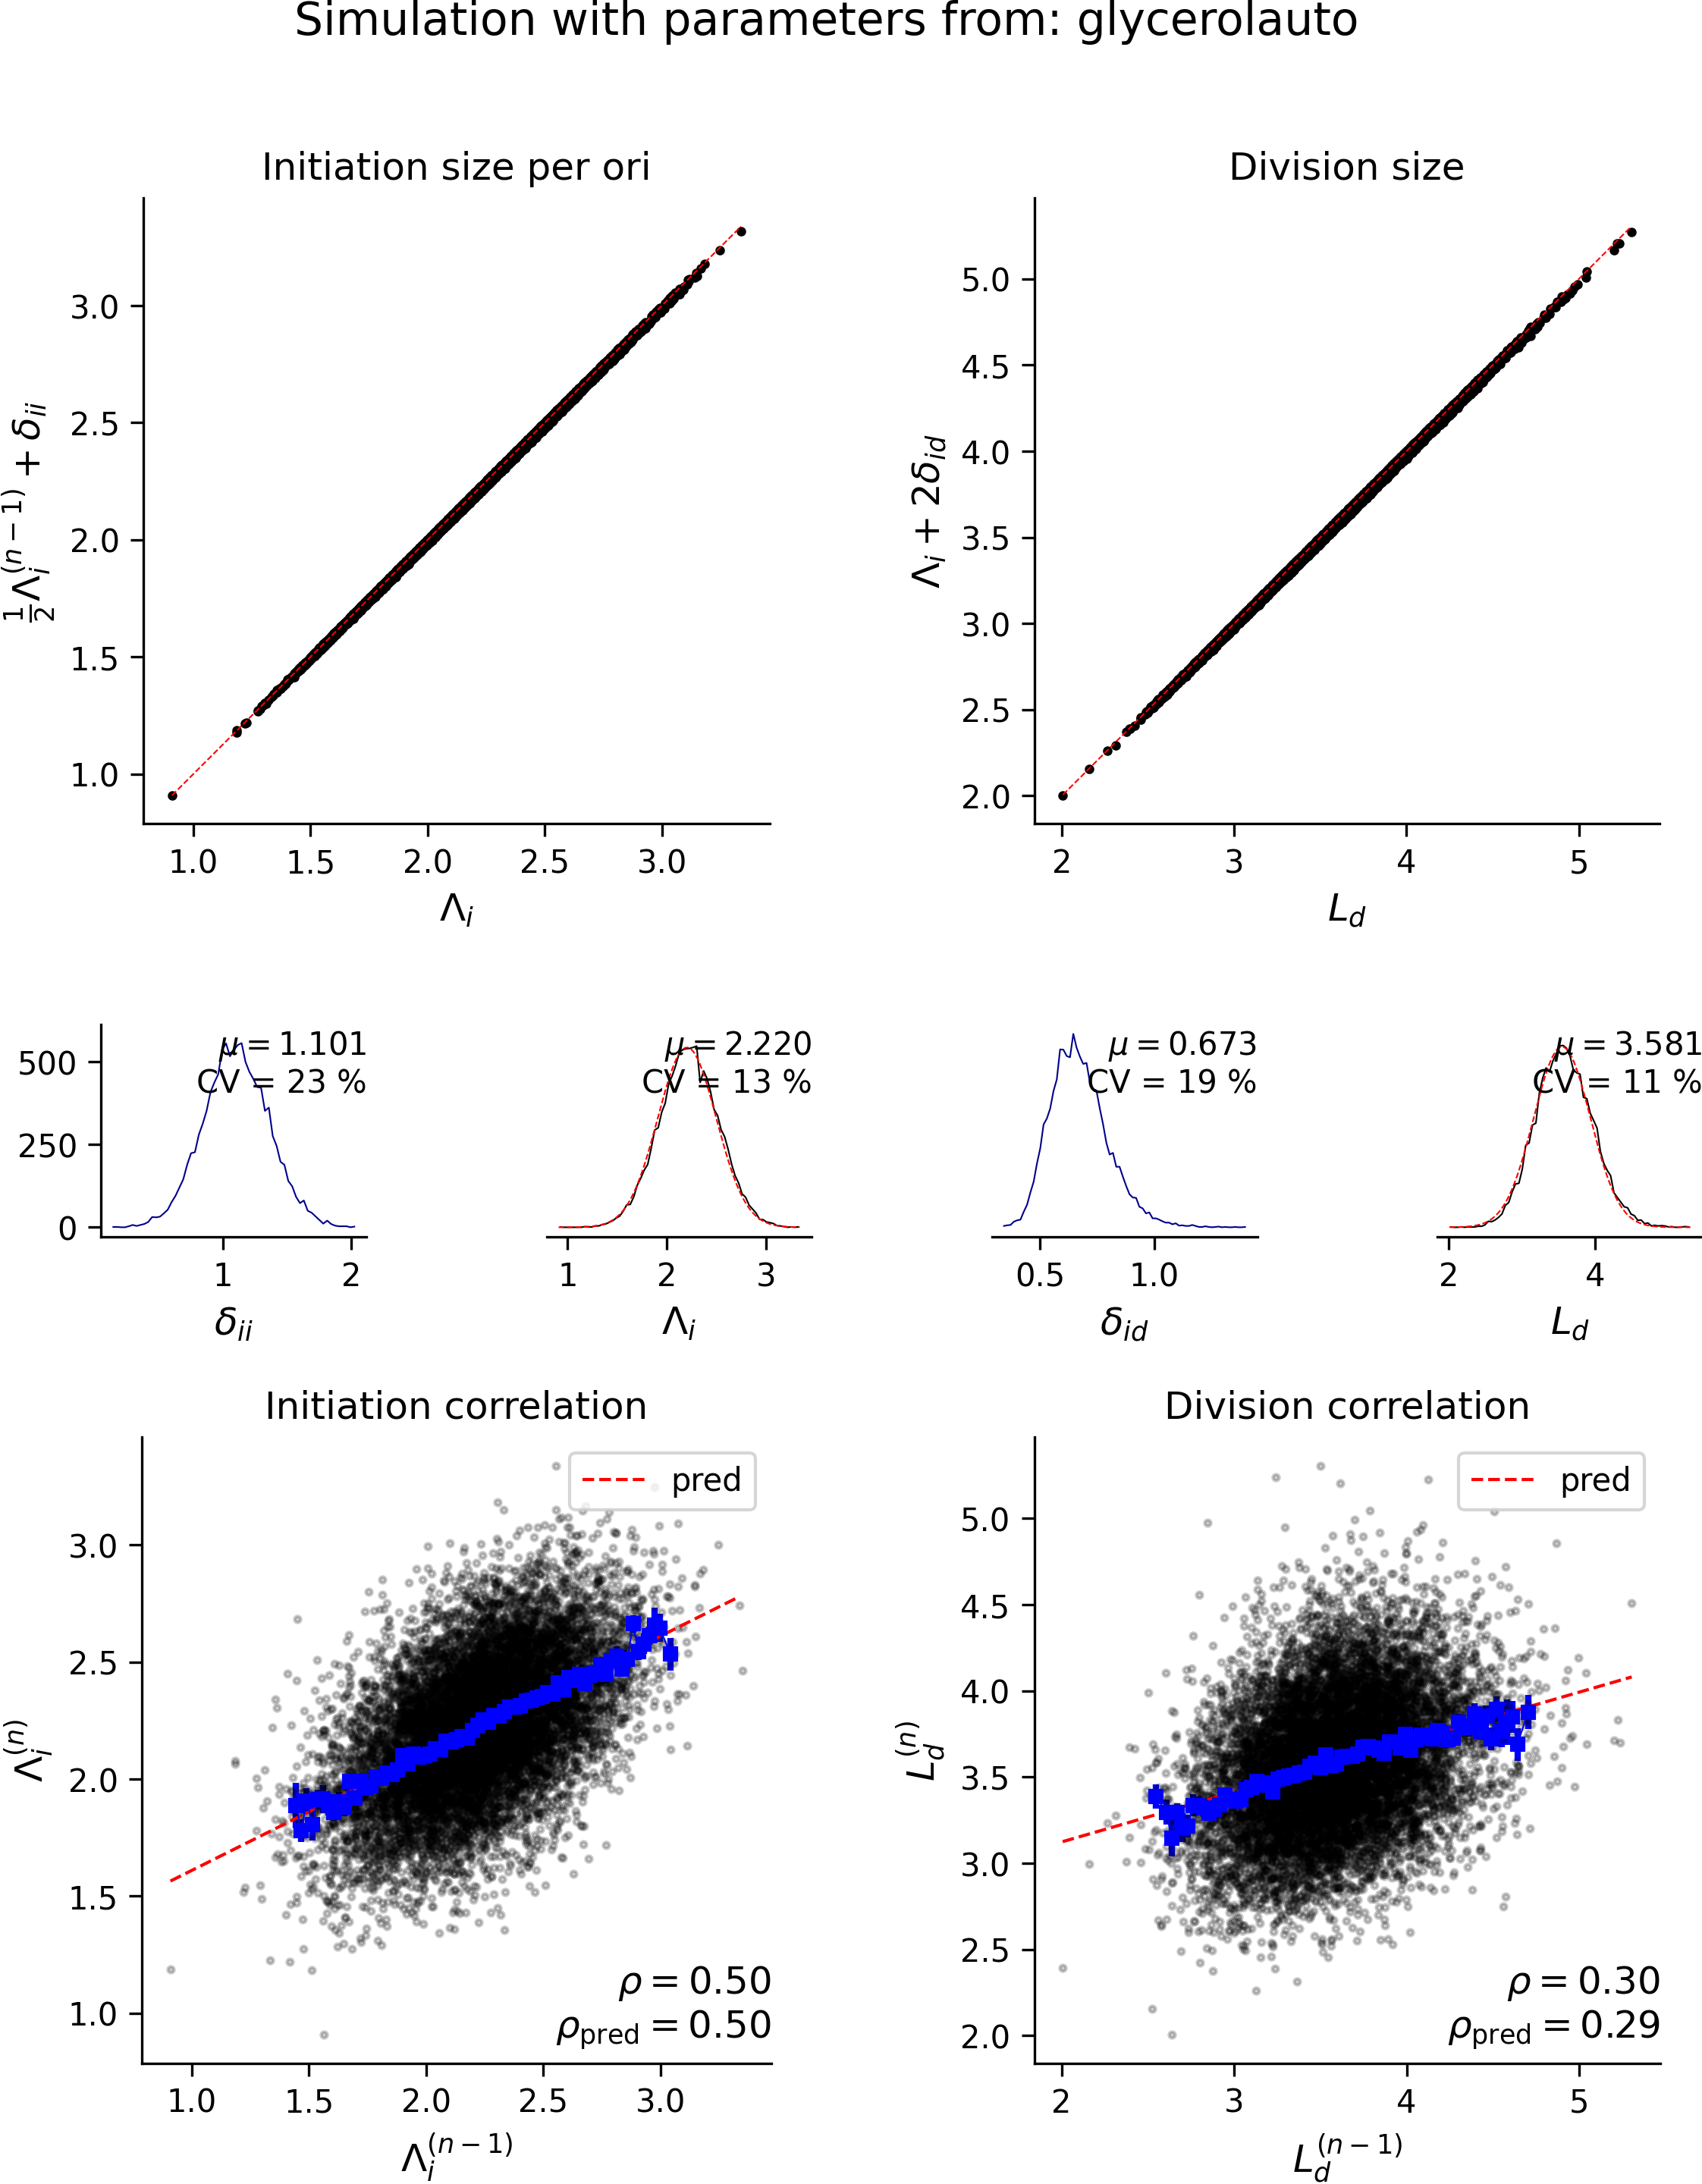

In [6]:
name = 'glycerolauto'
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

The previous figure shows that the simulations exactly reproduce the analytical results.